In [1]:
#| output: false
import pandas as pd 
import plotly.express as px
import plotly.io as pio
import pickle
import itables
pio.templates.default = "plotly_white"
df_kaggle = pd.read_csv("mbti_1.csv")
file_names = [
    "원래자료.pkl",
    "실험1결과요약.pkl",
    "실험1모델비교AUC.pkl",
    "실험1모델비교F1.pkl",
    "실험1모델비교PRE.pkl",
    "실험1모델비교REC.pkl",
    "실험셋업시각화_실험1시나리오1.pkl",
    "실험셋업시각화_실험3시나리오2.pkl",
    "실험셋업시각화_실험1시나리오2.pkl",
    "실험셋업시각화_실험3시나리오3.pkl",
    "실험셋업시각화_실험1실험계획.pkl",
    "실험셋업시각화_실험3시나리오4.pkl",
    "실험셋업시각화_실험2시나리오0-3.pkl",
    "실험셋업시각화_실험3시나리오5.pkl",
    "실험2결과요약.pkl",
    "실험셋업시각화_실험3시나리오6.pkl",
    "실험셋업시각화_실험3시나리오0.pkl",
    "실험셋업시각화_실험3시나리오7.pkl",
    "실험셋업시각화_실험3시나리오1.pkl",
    "실험3결과요약.pkl",
    "실험2결과요약.pkl"
]
def _load(path):
    with open(path,'rb') as f:
        rtn = pickle.load(f)
    return rtn 
    
figs = {fname.replace('.pkl',''): _load(f'./plotlyFigures/{fname}') for fname in file_names}

## Outline

- Introduction

- Related Works

- Data Description 

- Experimental Research

- Conclusion and Discussion

::: {.notes}
이번 발표 순서는 

- 서론

- 관련 연구

- 데이터 설명

- 실험연구 

- 결론 및 토의 
:::

# Introduction

## Introduction 

Introduction to ChatGPT

- ChatGPT is a language model developed by OpenAI, functioning as an interactive artificial intelligence for conversation.

- Its primary capabilities lie in natural language understanding and generation. Leveraging the provided data, this model can respond to questions on various topics, engage in conversation, and generate sentences, paragraphs, or entire pieces of text.

::: {.notes}
ChatGPT 소개

-  ChatGPT는 언어 모델이며 OpenAI에서 개발한 대화형 인공 지능임.
   
-  주요 능력은 자연어 이해와 생성이다. 이 모델은 주어진 데이터를 바탕으로 다양한 주제에 대한 질문에 응답하고, 대화를 진행하며 문장, 단락, 글 전체를 생성할 수 있음.
:::

## Introduction

![Figure 1: Illustration of GPT Application - Responding to a query regarding appropriate shopping items for colder weather, GPT provides a recommendation.](./figs/gpt_list.png){width=80%}

::: {.notes}
- 사진은 ChatGPT에게 날이 추워져서 어떤 물건들을 쇼핑하면 좋을지 물어봤을 때 GPT가 문장을 생성해 리스트를 알려준 것입니다.
- 쇼핑 리스트를 보고 저는 4.번의 추운 겨울에도 스마트폰을 할 수 있는 장갑인 'Smart Device Gloves'를 추천해준 것을 보고 gpt의 문장생성이 좋다고 생각함. 왜냐하면 이러한 아이템은 내가 생각하지 몰랐던 소품이기 때문. 
- GPT의 추천리스트가 나에게 때때로 유용했지만, 다른사람들에게도 객관적으로 유용할지 (즉 데이터로써의 가치가 있을지), 그리고 유용하다면 실제데이터 대비 얼마나 유용한지 연구해보고 싶었음. 
:::

## Introduction

Assessing the Potential of GPT-Generated Content

- While prior examples have demonstrated the practicality of GPT for various tasks, the potential of GPT-generated content as a dataset has not been thoroughly explored. 
- We aim to bridge this research void by conducting a series of experiments to enrich textual data with GPT-generated models and evaluate the enhancements in performance on subsequent machine learning tasks.


::: {.notes}
- GPT는 다양한 작업에 실용성을 보여주고 있다. 
- 앞의 예시가 GPT의 실용성을 보여주었지만, GPT가 생성한 내용이 데이터세트로서의 잠재력은 충분히 연구되지 않았다. 
- 우리는 GPT가 생성한 자료로 텍스트데이터를 증강하고, 이후 기계학습 모형에서 성능개선정도를 평가하는 일련의 실험을 수행하여 GPT가 생성한 내용이 데이터로써 가치가 있는지 연구하고자 한다. 
:::

## Introduction 

The research is divided into two main aspects:

1. Do the materials generated by GPT possess value as augmented data?
2. If they hold value, how significant is that value compared to actual data?
   - Whether they are of equivalent value. If not equivalent, whether they have value as independent data.
   - If they can only serve as a supporting role to actual data.

::: {.notes}
연구는 크게 두개의 측면으로 나눈다. 
1. GPT에 의하여 생성된 자료는 증강된자료의 가치가 있는가? 
2. 가치가 있다면 실제자료대비 얼마나 가치가 있는가? 
- 동등한 가치를 가지는지, 혹은 동등하지 않지만 독립적인 데이터로써의 가치를 가지는지 
- 실제자료를 보조하는 역할만 수행할 수 있는지 
:::

## Introduction

![Figure 2: Graphical Illustration of the Research Methodology](./figs/mbti_model.png){width=70%}

::: {.notes}
이것은 대략적인 연구방법을 그림으로 표현한 것입니다. 실제 데이터만을 가지고 모델을 시뮬레이션 해보고, 실제 데이터와 생성 데이터를 합쳐서 모델 시뮬레이션을 한뒤 결과를 비교하는 방식으로 연구가 진행된다.
::: 

# Related Works

## Related Works

Text augmentation can be useful in various situations, and here are some examples of when text augmentation may be needed. Of course, text augmentation can also be useful in other cases.

- Imbalanced Data
- Few-Shot Learning (Zero-Shot Learning)
- Privacy Protection

## Related Works

**Imbalanced Data**:

- The data imbalance problem in machine learning, where one class is significantly larger than another, can lead to model bias towards the majority class. 
- To address this, literature offers various solutions categorized into pre-processing, cost-sensitive, algorithmic, and hybrid methods, with resampling techniques like under-sampling, over-sampling (e.g., SMOTE, ADASYN), and hybrid methods being prominent for structured data, while GAN-based approaches are emerging for image data. 

## Related Works

**Few-Shot Learning (or Zero-Shot Learning)**:

- Few-shot text classification involves training models with a minimal number of examples. 
- Studies have investigated methods for this approach, focusing on machine learning techniques to select the best category samples for effective classification.

## Related Works


In NLP, there are two main types of data augmentation methods:

- Traditional text-level methods, like synonym replacement, random deletion, and random insertion, which rely on direct operations on existing samples [@feng2021survey].
- Methods utilizing language models, including backtranslation [@sennrich2015improving] and word vector interpolation [@jindal2020augmenting], which leverage language models for data augmentation .


## Related Works

- However, traditional methods have limitations in terms of text data accuracy and diversity, as discussed in a survey by Bayer et al. [@bayer2022survey].

- Recently, with the emergence of very large language models like the GPT family, there has been active research aimed at using them to augment text and address various NLP problems. 

## Related Works

- Haixing Dai and colleagues introduced AugGPT[@dai2023chataug], a text data augmentation technique using ChatGPT to rephrase sentences for enhanced NLP model training and improved text classification results.
- Seokjin Oh and Woohwan Jung proposed a data augmentation method for neural machine translation that leverages generative language models to enhance performance [@oh2023data]. 

# Data Description

## Data Description

Real-World Data from Kaggle

- Overview of Kaggle Dataset
- Characteristics and Features of the Data

Synthetic Data Generation via GPT

- Detailed Process of Data Creation with GPT
- Challenges in the Generation Process (e.g., Emoticons, Length, Duplicated Content)

## Data from Kaggle

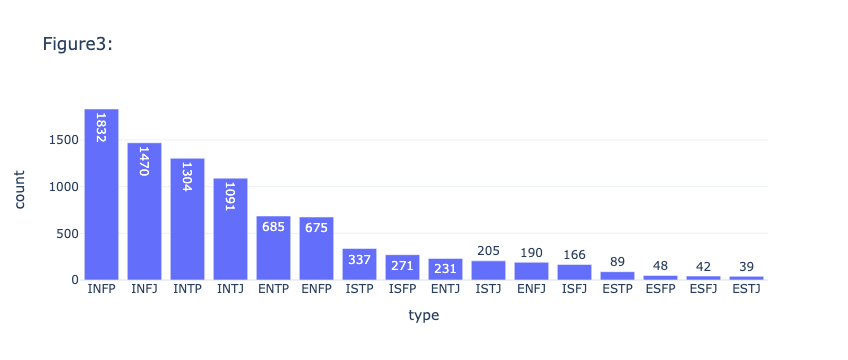

In [56]:
figs['원래자료'].layout['title']['text']='Figure3: '
figs['원래자료'].show(width=750)

::: {.notes}
실제 데이터의 각 항목당 평균 데이터 수가 490여개인데, 데이터의 최대수는 1800여개이고, 최소는 40여개 정도이다. 총 16개의 항목 중에 데이터수가 적은 'ESTP', 'ESFP', 'ESFJ', 'ESTJ' 이 네 개의 데이터를 보완해주는 데이터를 만들었음.
:::

## Data from ChatGPT

Verification of Similarity:

:::: {.columns}

::: {.column width="50%"}
:::{.callout-note}
#### Kaggle-sourced ESTP Data

Splinter Cell Blacklist for Xbox 360. If you get hated on then it's because you as a person have something to work on. I often come off to people with the opposite of my intention, if I don't listen to my gut. Sometimes I over think my natural social skills and come off as a sarcastic douche.
:::
:::

::: {.column width="50%"}
:::{.callout-note}
#### ChatGPT-generated ESTP Data
Today, I had a fantastic experience enjoying adventures in nature! Hiking up a tall mountain, I experienced the beauty of the great outdoors. The view from the summit was absolutely breathtaking. Adventures like these always bring new challenges and a sense of accomplishment, so I want to do more of them!
:::

:::

:::: 

::: {.notes}
- 유사성의 확인

두 데이터를 비교해보면, 데이터가 문장 형식으로 어떠한 상황일 때 각 MBTI의 성격에 맞춰 작성될걸 보면 실제 데이터와 생성 데이터 간의 유사성이 드러납니다.
:::

## Data from ChatGPT

MBTI example

::: {.panel-tabset}
#### E 
![](./figs/mbti_ex/mbti-e.png){width=100%}

#### I
![](./figs/mbti_ex/mbti-i.png){width=100%}

#### S 
![](./figs/mbti_ex/mbti-s.png){width=100%}

#### N
![](./figs/mbti_ex/mbti-n.png){width=100%}

#### F 
![](./figs/mbti_ex/mbti-f.png){width=100%}

#### T
![](./figs/mbti_ex/mbti-t.png){width=100%}

#### P 
![](./figs/mbti_ex/mbti-p.png){width=100%}

#### J
![](./figs/mbti_ex/mbti-j.png){width=100%}
:::

::: {.notes}
##### - E : 외향적인 성향을 가진 사람들은 외부 세계에서 활동하며 에너지를 충전합니다. 사교적이고 활발한 특징을 보입니다.
  - 휴가라면 늘 그렇게 생각해요! 이번 휴가에서는 "함께 하는 여행을 통해 새로운 경험을 만들고 싶어졌어요." 친구들과 모여 활기찬 여행지로 떠나기로 했어요. 맛집 탐방, 액티비티 참여, 그리고 늦은 밤까지 이야기 나누며 불태우는 캠프파이어, 모두가 함께 할 때 특별한 순간들이 만들어지니까요. "새로운 친구들과 인연을 만들며, 함께한 시간을 소중히 기억하며 즐거운 휴가를 보낼 계획이에요!"
  
##### - I : 내향적인 성향을 가진 사람들은 내부의 세계에 주로 주의를 기울이며, 외부 자극에 덜 민감합니다. 고요하고 조용한 환경에서 힘을 얻습니다.
   - 휴가는 나만의 작은 섬에서 시작돼요. 많은 사람들 속에서 피곤해진 나를 위해 "조용한 휴가지에서" 마음의 평화를 찾아가기로 했어요. 어딜 가든지 모두와 소통하고 즐기는 것도 좋지만, 때로는 "나만의 시간이 필요하다는 걸 느끼는 법이죠." 독서와 함께하는 차 한 잔, 끝없이 펼쳐진 바다 전경, 그리고 나만의 생각에 잠겨 여유를 만끽할 예정이에요. 이 휴가를 통해 "나 자신과 조금 더 가까워지며", 충전된 에너지로 돌아오게 될 것 같아요.
   
##### - S : 감각적 성향을 가진 사람들은 현재 경험에 주의를 기울이며, 실제 사실과 경험에 근거하여 문제를 해결하는 경향이 있습니다.
  - 미술관에서의 나의 시간은 감각적인 여행으로 시작돼요. 작품들 사이를 걷다보면 그 작품들이 나를 끌어들이듯이, 감각들이 마음을 자극해요. 첫 걸음을 내딛는 순간부터 "작품들이 품은 향기, 색감, 질감을 느껴요." 그림들이 펼쳐내는 세계에 빠져들어, 현실과 미술의 경계가 흐려지는 순간이에요. "손으로 작품의 표면을 스쳐 만져보며, 작가의 감성을 직접 느끼는 것"이 미술관에서의 나만의 특별한 방식이죠.
  
##### - N : 직관적 성향을 가진 사람들은 미래에 대한 가능성을 탐험하고, 추상적인 아이디어와 개념에 관심을 갖습니다. 비전을 추구하며 창의적입니다.
  - "미술관에서 나의 여정은 상상력의 탐험으로 가득 차 있어요." "작품 하나하나가 숨겨진 이야기와 메시지를 품고 있을 거라는 호기심에 가득 차 있어요." 그림과 조각품들은 더 큰 이야기를 품고 있는 것 같아, 작품의 주변을 돌아다니며 "그 이면에 담긴 의미를 찾아내려 노력해요." 작가가 작품에 담은 아이디어와 감정을 이해하고, 더 깊이 있는 연결을 찾아내는 것이 나만의 미술 감상 방법이에요.
  
##### - F : 감정적 성향을 가진 사람들은 타인의 감정에 민감하고, 대인관계에서 조화와 이해를 중시합니다. 주관적인 가치 판단을 내립니다.
  - 오늘은 "따뜻한 감성으로" 업무를 처리하는 날이었어요. 팀원들과 함께 모여 "업무에 앞서 목표를 공유하고 각자의 의견을 존중했어요." 감성적인 분위기 속에서 각자의 감정을 표현하면서 업무에 헌신했어요. 문제에 부딪혔을 때에도 "서로의 감정을 이해하고 존중하는 것이 핵심이었어요." 오늘은 팀원들과 함께 "감성적으로 소통하며" 일하는 특별한 날이었어요.
  
##### - T : 논리적 성향을 가진 사람들은 논리적이고 분석적으로 문제를 해결하며, 객관적인 기준에 따라 결정을 내립니다.
  - 오늘은 "논리적"으로 업무를 처리하는 하루였어요. 먼저 목표를 "분석하고" 각 단계를 "체계적으로 나누어(분류해)" 계획을 세웠어요. 문제가 발생하면 객관적으로 해결책을 도출하고 "효율적인" 방법으로 진행했어요. "논리적인 사고로" 업무를 체계적으로 해결하며, 목표 달성에 중점을 두었던 하루였어요.
  
##### - P : 지각적 성향을 가진 사람들은 유연하고 적응력이 있으며, 상황에 따라 즉흥적으로 대처하는 경향이 있습니다.
  - 오늘, 나는 즉흥적인 여행을 떠나기로 결정했다! 가방을 비우고 필수품만 싸서 가벼운 마음으로 나섰다. 목적지는 정해지지 않았고," 그냥 흘러가기로 했다. "어떤 계획도 없이" 길을 따라 모든 것을 즐기기를 기대하고 있다. 필수품과 나만의 음악 플레이리스트만을 가지고, "뜻밖의(예상치 못한)" 보석과 우연한 만남을 기대하며 나는 예상치 못한 모험에 대비했다. 이 즉흥적인 모험에서의 순간들을 인스타그램에서 공유하는 즐거움에 건배해요!
  
##### - J : 판단적 성향을 가진 사람들은 계획적이고 조직적으로 일을 처리하며, 목표 달성을 위해 계획을 세우는 것을 선호합니다.
  - 오늘은 철저한 "여행 계획"을 세우고 준비하는 날이에요! 여행지부터 숙소, "일정까지 모든 것을 완벽하게 계획해두었어요." 미리 알아보고 싶었던 명소와 맛집, 현지 문화까지 꼼꼼하게 살펴보며 풍성한 여행을 위해 최선을 다했어요. 가방 속에는 각종 필수품과 함께 여행 일정표와 지도까지! 오늘은 계획대로 완벽한 여행을 즐길 준비를 마치고, 모든 것을 기록해 인스타에서 여행 이야기를 나누어보려고 해요.
::: 

## Data from ChatGPT

Title: GPT Data Collection Process

Data Collection Process:

1. Define the MBTI for Performance Measurement.

2. Define the Topic: Clearly define a topic for ChatGPT, presenting scenarios such as traveling to a destination or being invited to a friend's birthday party. Request predictions on how one might post on Instagram in such situations.

Setting such conditions helps define the scope of generated data, preventing responses from being too similar.

:::{.notes}
제목: GPT 자료 수집 과정

자료 수집 과정:

1. 성능 측정할 각 MBTI 결정

2. 주제 정의: ChatGPT에게 명확한 주제를 정의  ex) 여행지를 놀러갔을 경우, 친구 생일파티에 초대되었을 경우 등 상황을 제시, 인스타그램에 어떻게 게시물을 올릴지 예측해달라고 하고 싶어 그렇게 질문함.

이러한 조건을 설정하지 않으면 답변들이 비슷하게 나오기 때문에 생성 자료의 범위를 정의하는 데 도움이 됨
:::

## Data from ChatGPT

## 
3. Utilizing the GPT model, automatically generate posts for each MBTI personality type based on the given topics and conditions.

   Responses vary and are diverse depending on the identified MBTI when conditions are provided.

:::{.notes}
3. GPT 모델을 활용하여 각 MBTI 성격 유형별에 위의 주어진 주제와 조건에 따른 게시물을 자동으로 생성을 함.

    조건을 주어졌을 때 어떤 MBTI인지에 따라 다르고 다양한 답변이 나옴.
:::

## Data from ChatGPT

##
4. Review the initially generated data and adjust conditions as needed to align with research objectives.

   Modifications were made to the generated content to better fit the research goals. Specifically, for an Instagram-like post, the MBTI and emoji included in the original sentence were removed as requested. 
   
   Additionally, adjustments were made to ensure the character count per question is around 1,500 aiming for a balance similar to real-world data.
   
   This process aimed to enhance the quality of the data, and the selected data was finalized.

:::{.notes}
4. 처음 생성된 자료를 확인하고, 필요에 따라 조건을 수정하여 연구 목표에 부합하도록 조정함.
    
   실제 인스타그램 게시물처럼 질문한 MBTI와 이모티콘이 함께 작성되어 문장 속에 해당 MBTI와 이모티콘을 빼달라는 수정을 하였다.

   그리고 한 질문당 글자수가 너무 작거나 많은 등 글자수의 차이가 심해 실제 데이터와 비슷하게끔 1,500자로 설정을 했음.
   
   이로써 자료의 품질을 향상시키고 선택된 자료를 확정했음.
:::

## Data from ChatGPT

Challenges in Data Collection: The Issue of Subsequent Regeneration of Similar Content in Generated Data

{{< video https://youtu.be/pllsvfYyWzo?si=xJ5WbiBtG_VwPYvL >}}

## Data from ChatGPT

Challenges in Data Collection: The Issue of Class Names Being Included in the Generated Text

::: {.panel-tabset}
#### Ex 1
![](./figs/mbti_class/mbti_class1.png){width=100%}

#### Ex 2
![](./figs/mbti_class/mbti_class2.png){width=100%}

#### Ex 3
![](./figs/mbti_class/mbti_class3.png){width=100%}

#### Ex 4
![](./figs/mbti_class/mbti_class4.png){width=100%}

#### Ex 5 
![](./figs/mbti_class/mbti_class5.png){width=100%}
:::

::: {.notes}
- 데이터 수집의 어려움
  - Class이름
::: 

## Data from ChatGPT

Challenges in Data Collection: The Issue of Emojis Being Included in the Generated Text

::: {.panel-tabset}
#### Ex 1
![](./figs/imo/imo1.png){width=100%}

#### Ex 2 
![](./figs/imo/imo2.png){width=100%}

#### Ex 3
![](./figs/imo/imo4.png){width=100%}

#### Ex 4
![](./figs/imo/imo5.png){width=100%}
:::

::: {.notes}
- 데이터 수집의 어려움
  - 이모티콘
::: 

## Data from ChatGPT {.scrollable}


Challenges in Data Collection: The Issue of Varying Lengths in Generated Texts

::: {.panel-tabset}

#### Ex 1 
![](./figs/gpt_screen10.png){width=100%}

#### Ex 2
![](./figs/gpt_screen11.png){width=100%}
:::

::: {.notes}
- 데이터 수집의 어려움
  - 생성된 글의 길이 차이
::: 

## Data from ChatGPT 

Appropriately Generated Results

![](./figs/gpt_screen12.png){width=100%}

::: {.notes}
- 데이터 수집의 어려움
  - 결과 도출
::: 

# Experimental Research

## Experiment 1

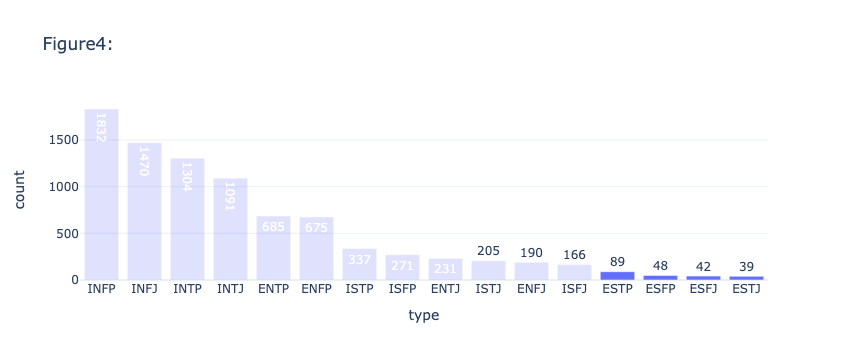

In [57]:
figs['실험셋업시각화_실험1실험계획'].layout['title']['text']='Figure4: '
figs['실험셋업시각화_실험1실험계획'].show(width=750)

::: {.notes}
저희의 실험계획은 가장 데이터 양이 적은 'ESTP, ESFP, ESFJ, ESTJ' 네 개의 데이터의 불균형이 GPT 생성 데이터로 얼마나 개선이 되는지 보여드리려고 합니다.
::: 

## Experiment 1

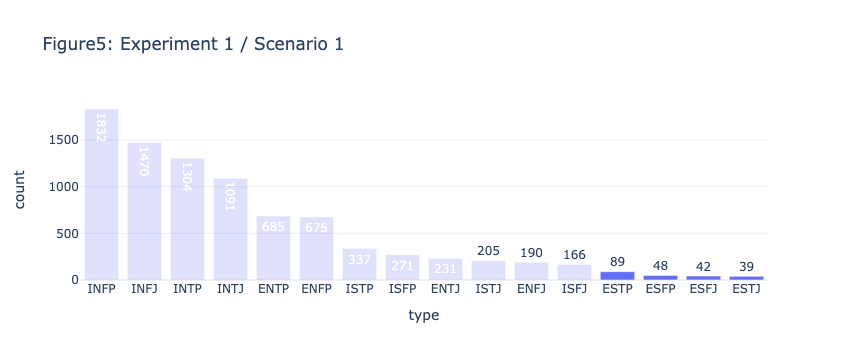

In [60]:
figs['실험셋업시각화_실험1실험계획'].layout['title']['text']='Figure5: Experiment 1 / Scenario 1 '
figs['실험셋업시각화_실험1실험계획'].show(width=750)

::: {.notes}
train과 test가 보통 7:3 정도 비율인데 5:5로 한 이유는 7:3으로 하면 뒤에 데이터의 수가 적어져서이다.

이 데이터를 시뮬레이션 하면 뒤에 4개의 데이터의 결과가 좋지 않게 나올 것이다.
::: 

## Experiment 1

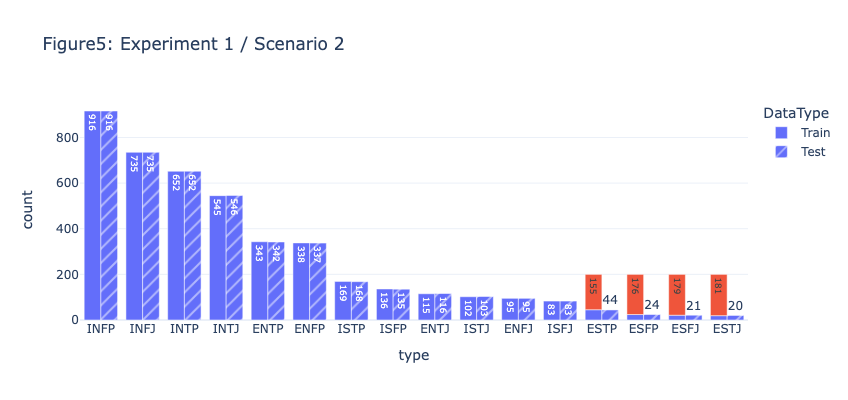

In [62]:
figs['실험셋업시각화_실험1시나리오2'].layout['title']['text']='Figure5: Experiment 1 / Scenario 2 '
figs['실험셋업시각화_실험1시나리오2'].show(width=750)

::: {.notes}
데이터를 train과 test로 나눠봤습니다

가장 데이터 수가 적은 4개의 데이터에 GPT 생성 데이터를 추가시켰습니다

파란색은 실제 데이터이며, 빨간색이 gpt 생성 데이터이다.
::: 

## Experiment 1

In [74]:
itables.show(pd.read_csv("실험결과/실험1/시나리오1.csv").rename({'Unnamed: 0':'Method','Unnamed: 1':'Metrics'},axis=1).set_index(['Method','Metrics']).stack().reset_index().set_axis(['Method','Metrics','MBTIType','Value'],axis=1))

## Experiment1

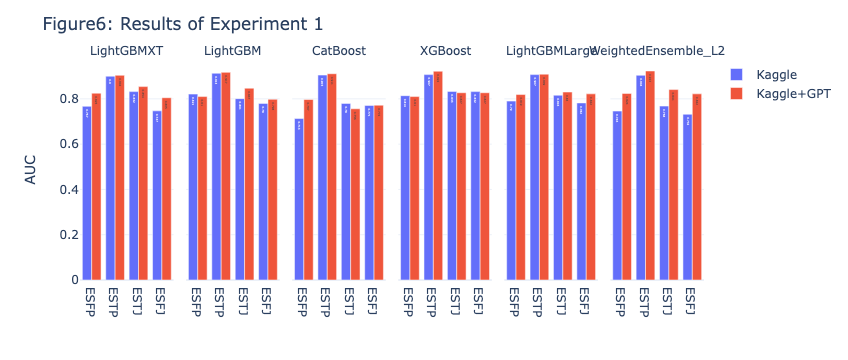

In [88]:
figs['실험1결과요약'].layout['title']['text']='Figure6: Results of Experiment 1'
figs['실험1결과요약'].show(width=750)

::: {.notes}
대체적으로 파랑색보다 빨간색의 모형설정이 더 높게 나왔다. 그러므로 gpt로 설정된 데이터가 모형성능을 개선하는데 도움이 되었다 
::: 

## Experiment1

::: {.panel-tabset}
#### Recall

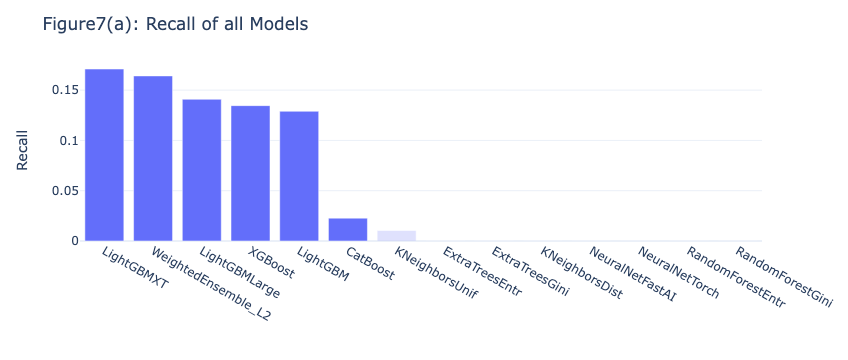

In [79]:
figs['실험1모델비교REC'].layout['title']['text']='Figure7(a): Recall of all Models'
figs['실험1모델비교REC'].show(width=750)

::: {.notes}
 macro recall이며, one vs other recall (하나만 1이고 나머지를 0으로 두고 한다)
::: 

#### Precision

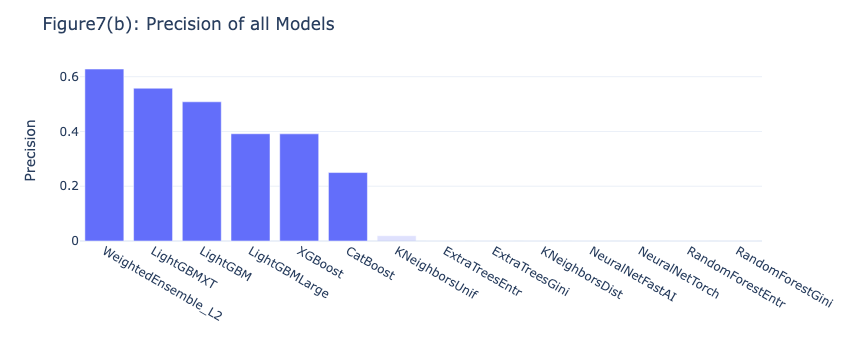

In [80]:
figs['실험1모델비교PRE'].layout['title']['text']='Figure7(b): Precision of all Models'
figs['실험1모델비교PRE'].show(width=750)

#### F1 score

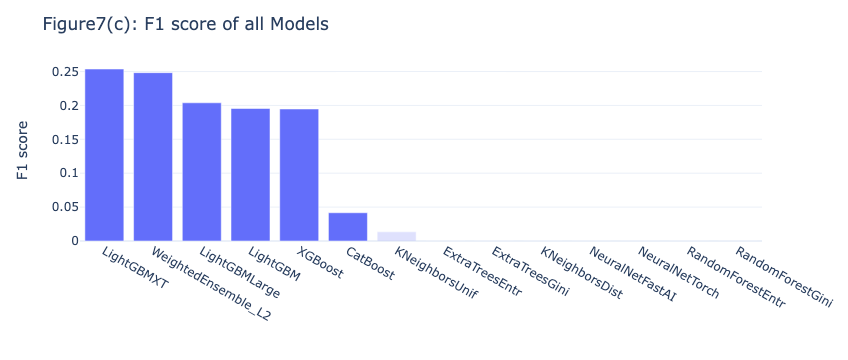

In [81]:
figs['실험1모델비교F1'].layout['title']['text']='Figure7(c): F1 score of all Models'
figs['실험1모델비교F1'].show(width=750)

#### AUC

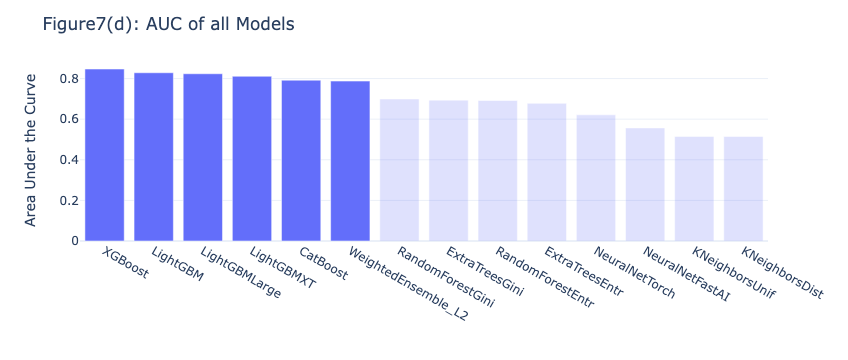

In [82]:
figs['실험1모델비교AUC'].layout['title']['text']='Figure7(d): AUC of all Models'
figs['실험1모델비교AUC'].show(width=750)

::: {.notes}
랜덤으로 찍으면 0.5가 나온다. 그래서 다 0.5보다 위이다

recall, precision, f1score, auc 네 가지를 돌려보았고, 모델을 6개만 사용한 이유는 이렇게 6가지가 가장 유의미했고, auc 모델만 결과요약에 사용한 것은 스레시홀드가 상관이 없고, 대중적으로 많이 사용하는 것이라 결과로 내보았다.
::: 

:::

## Experiment2

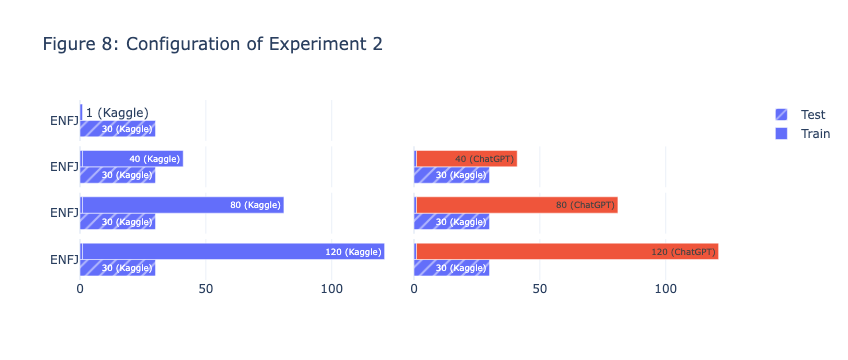

In [86]:
figs['실험셋업시각화_실험2시나리오0-3'].layout['title']['text']='Figure 8: Configuration of Experiment 2'
figs['실험셋업시각화_실험2시나리오0-3'].show(width=750)

::: {.notes}
enfj에 대한 거를 30개를 넣고 테스트를 해봤습니다

다음은 40개, gpt에서도 40개

다음은 80개, gpt에서도 80개

다음에서도 120개, gpt에서도 120개 --> 질적으로 얼마나 좋은지 (총 7번 실험한 것)

왼쪽에 있는 데이터는 실제 데이터를 추가한 것이고, 오른쪽은 GPT 데이터를 추가한 것이다.
::: 

## Experiment2

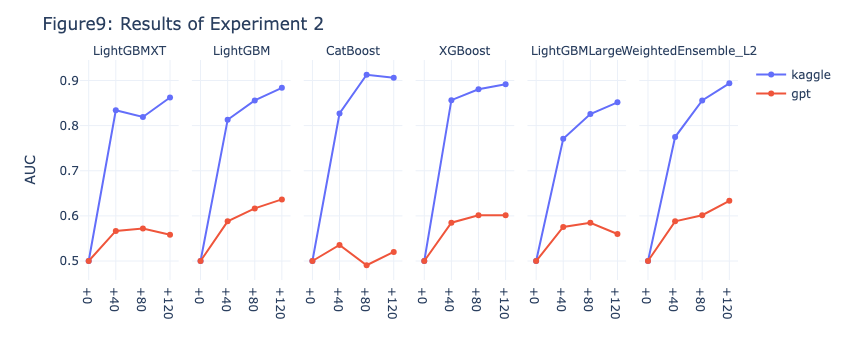

In [89]:
figs['실험2결과요약'].layout['title']['text']='Figure9: Results of Experiment 2'
figs['실험2결과요약'].show(width=750)

::: {.notes}
파란색이 캐글만 추가시킨 거, 빨간색이 gpt만 추가시킨 거 입니다

질적연구에서는 실제 데이터와 합쳐졌을 때는 괜찮은데 단독으로만은 gpt 데이터가 좋은 데이터는 아니라는 것을 알 수 있습니다.

auc라 0.5에서 시작한다
::: 

## Experiment3

::: {.panel-tabset}
#### +0 

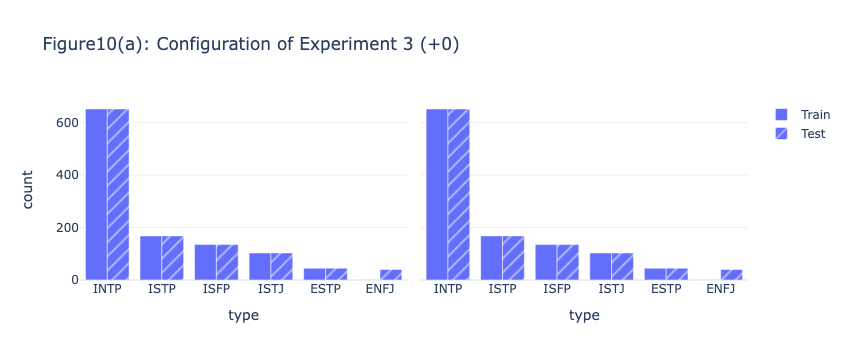

In [93]:
figs['실험셋업시각화_실험3시나리오0'].layout['title']['text']='Figure10(a): Configuration of Experiment 3 (+0)'
figs['실험셋업시각화_실험3시나리오0'].show(width=750)

::: {.notes}
ENFJ와 다른 데이터 5개를 추가
ENFJ만 train 데이터를 안한다
::: 

#### +20

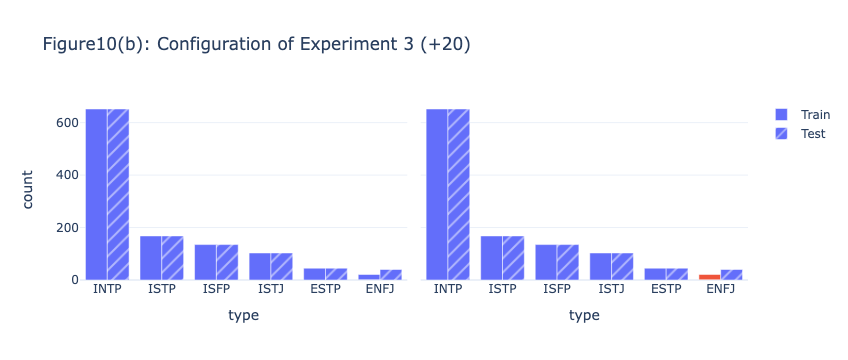

In [95]:
figs['실험셋업시각화_실험3시나리오1'].layout['title']['text']='Figure10(b): Configuration of Experiment 3 (+20)'
figs['실험셋업시각화_실험3시나리오1'].show(width=750)

::: {.notes}
ENFJ train data를 20 추가했다
::: 

#### +40

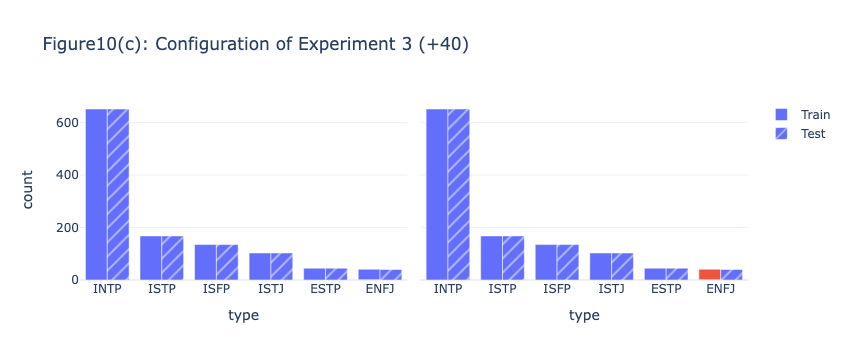

In [96]:
figs['실험셋업시각화_실험3시나리오2'].layout['title']['text']='Figure10(c): Configuration of Experiment 3 (+40)'
figs['실험셋업시각화_실험3시나리오2'].show(width=750)

::: {.notes}
ENFJ train data를 40 추가했다
::: 

#### +60

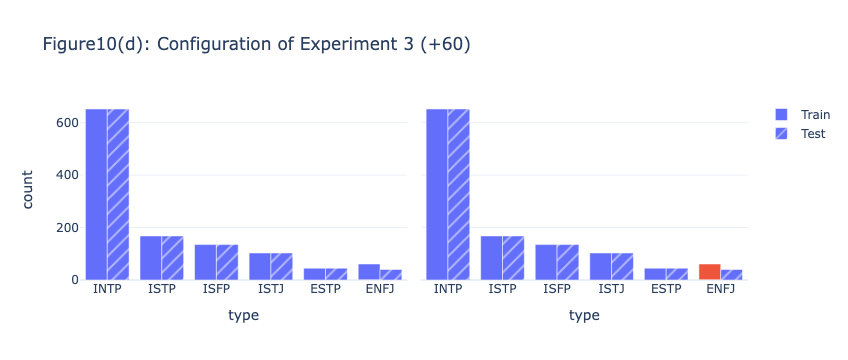

In [97]:
figs['실험셋업시각화_실험3시나리오3'].layout['title']['text']='Figure10(d): Configuration of Experiment 3 (+60)'
figs['실험셋업시각화_실험3시나리오3'].show(width=750)

::: {.notes}
ENFJ train data를 60 추가했다
::: 

#### +80

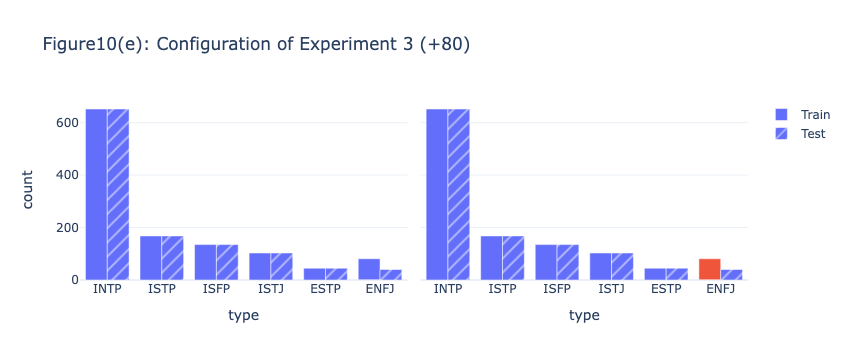

In [98]:
figs['실험셋업시각화_실험3시나리오4'].layout['title']['text']='Figure10(e): Configuration of Experiment 3 (+80)'
figs['실험셋업시각화_실험3시나리오4'].show(width=750)

::: {.notes}
ENFJ train data를 80 추가했다
::: 

#### +100

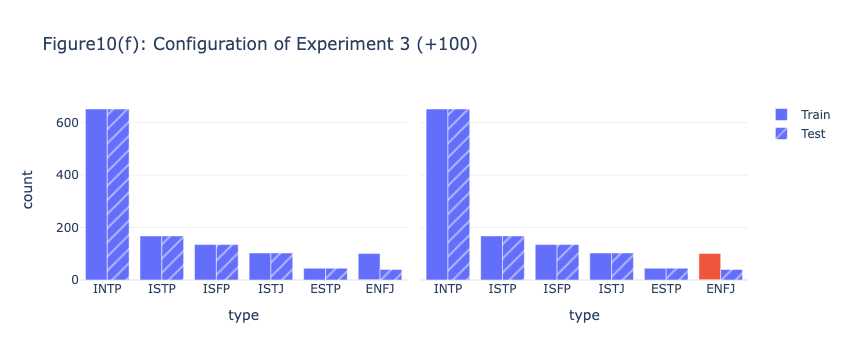

In [99]:
figs['실험셋업시각화_실험3시나리오5'].layout['title']['text']='Figure10(f): Configuration of Experiment 3 (+100)'
figs['실험셋업시각화_실험3시나리오5'].show(width=750)

::: {.notes}
ENFJ train data를 100 추가했다
::: 

#### +120

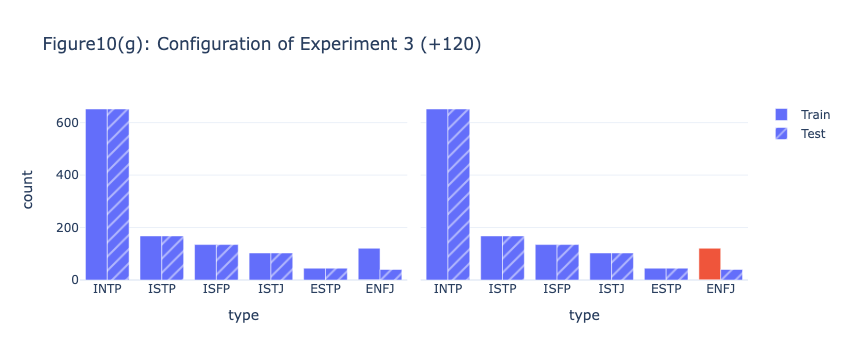

In [100]:
figs['실험셋업시각화_실험3시나리오6'].layout['title']['text']='Figure10(g): Configuration of Experiment 3 (+120)'
figs['실험셋업시각화_실험3시나리오6'].show(width=750)

::: {.notes}
ENFJ train data를 120 추가했다
::: 

#### +140

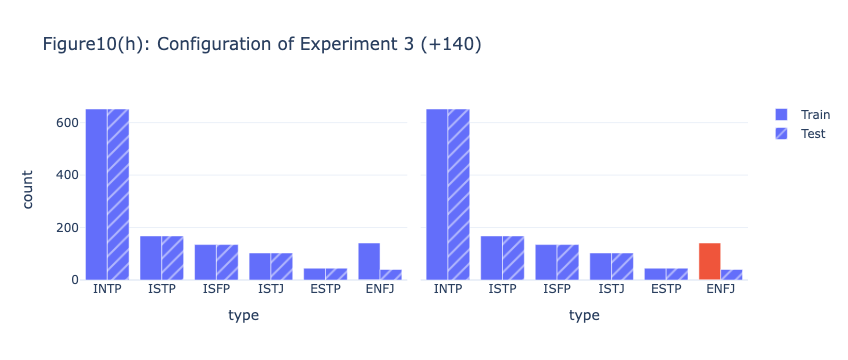

In [101]:
figs['실험셋업시각화_실험3시나리오7'].layout['title']['text']='Figure10(h): Configuration of Experiment 3 (+140)'
figs['실험셋업시각화_실험3시나리오7'].show(width=750)

::: {.notes}
ENFJ train data를 140 추가했다
::: 

:::

## Experiment3

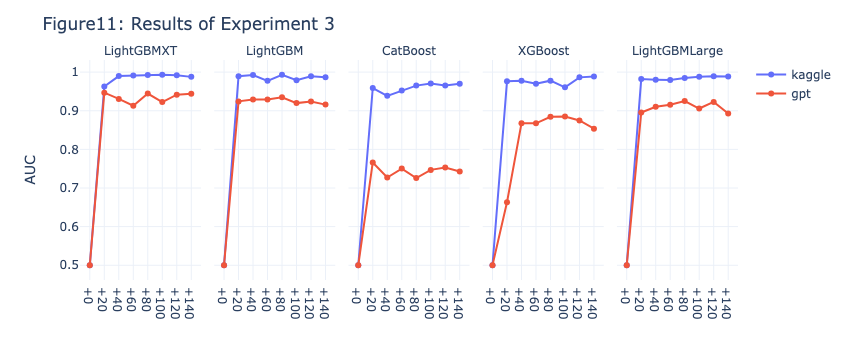

In [104]:
figs['실험3결과요약'].layout['title']['text']='Figure11: Results of Experiment 3'
figs['실험3결과요약'].show(width=750)

::: {.notes}
클래스 구분이 잘돼서 auc가 빠르게 올라간다
잘 안 올라가는것도 있는데 모델에 따라서 gpt가 제공한 데이터가 유용할때도 있고 아닐때고 있다 (특히 catboost라 리얼데이터는 확 올라가는데 gpt데이터는 많이 올라가지 않는다)
:::

# Reference